In [2]:
#!pip install kaggle

In [17]:
!mkdir ~/.kaggle

mkdir: /Users/toyosibamidele/.kaggle: File exists


In [18]:
!cp /Users/toyosibamidele/Downloads/kaggle.json /Users/toyosibamidele/.kaggle/kaggle.json

In [20]:
!cd /Users/toyosibamidele/.kaggle  && ls

kaggle.json


In [12]:
#!rm /Users/toyosibamidele/.kaggle/kaggle.json 

In [ ]:
##!chmod 600 /Users/toyosibamidele/.kaggle/kaggle.json

In [26]:
!kaggle datasets list -s 'Marketing Campaign'

ref                                                  title                                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
rodsaldanha/arketing-campaign                        Marketing Campaign                                   352KB  2020-05-08 13:14:32          16843        208  0.9117647        
volodymyrgavrysh/bank-marketing-campaigns-dataset    Bank marketing campaigns dataset | Opening Deposit   391KB  2020-01-12 10:35:36           9813        156  1.0              
chebotinaa/fast-food-marketing-campaign-ab-test      Fast Food Marketing Campaign A\B Test                  3KB  2021-09-13 15:35:57           1961         44  1.0              
ahsan81/superstore-marketing-campaign-dataset        Superstore Marketing Campaign Dataset                 55K

In [27]:
!kaggle datasets download -d 'davinwijaya/customer-retention'

  0%|                                                | 0.00/433k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 433k/433k [00:00<00:00, 6.66MB/s]


In [30]:
!sudo apt-get install unzip

Password:


In [29]:
!unzip customer-retention.zip -d ../dat

Archive:  customer-retention.zip
  inflating: ../dat/data.csv         


In [31]:
! cd ../dat && ls

data.csv


In [32]:
#Data Source - Kaggle.com

import pandas as pd
filepath = '../dat/data.csv'
data = pd.read_csv(filepath) 

In [33]:
#Data is sourced from Kaggle 
#Customer Retention data for Churn Prediction or Uplift Modelling
data.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


Data Dictionary
recency
months since last purchase

history
value of the historical purchases

used_discount
indicates if the customer used a discount before

used_bogo
indicates if the customer used a buy one get one before

zip_code
class of the zip code as Suburban/Urban/Rural

is_referral
indicates if the customer was acquired from referral channel

channel
channels that the customer using, Phone/Web/Multichannel

offer
the offers sent to the customers, Discount/But One Get One/No Offer

conversion
customer conversion(buy or not)

In [34]:
from pandas_profiling import ProfileReport
report = ProfileReport(data)
report

# initial eda results show no missing data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Key Questions?




What is the recency and historical spend distribution, is there any correlation with historical spend?

Is there any correlation between used bogo, used discount, is_referal offer and conversion?

What is the spend and recency comparison between zip and channel



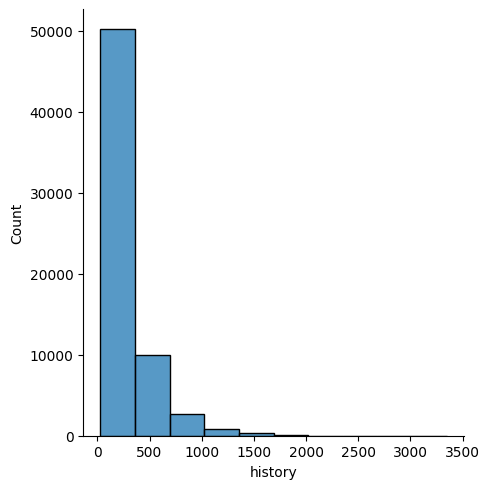

In [40]:
import seaborn as sns
%matplotlib inline
sns.displot(data['history'], bins = 10)


Data is right skewed
In right-skewed data, the mean is greater than the median, this means that the outliers on the right side of the 
distribution are pulling the mean to the right, making it greater than the median. 
This is because the outliers are not well represented by the mean but are well represented by the median.



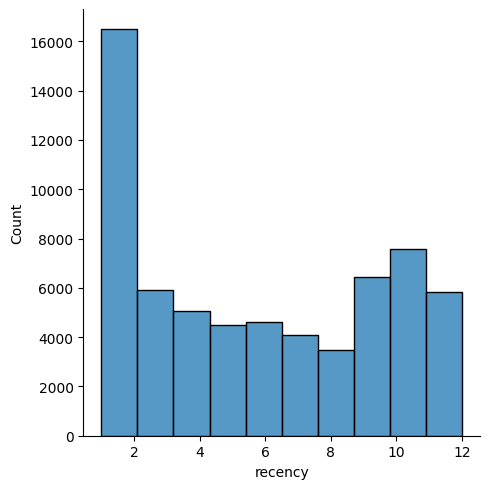

In [43]:
import seaborn as sns
%matplotlib inline
sns.displot(data['recency'], bins = 10)

Data is bimodal in nature 

A bimodal distribution is a type of probability distribution that has two distinct peaks, or modes. 
This means that the data is spread out over two different ranges, with 
one group of data points concentrated at one value and another group of data points concentrated at a different value. 
Bimodal distributions are typically visualized as a histogram, with two separate bars or peaks representing the two modes. 
It's also known as double peaked distribution.

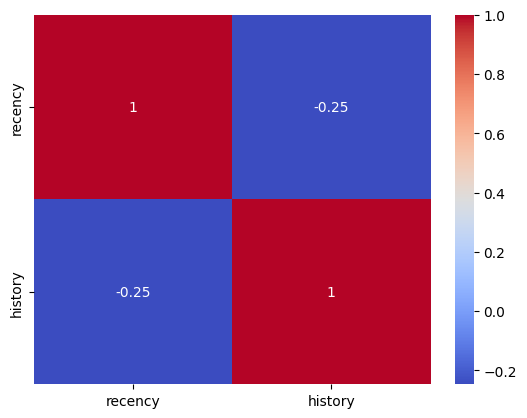

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap
sns.heatmap(data[['recency', 'history']].corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

--receny and history is negatively correlated 

As recency increases, the customer history spend decreases, this can indicate that users that frequently shop have a higher spend

A negative correlation is a statistical relationship between two variables in which one variable decreases as the other variable increases. In other words, as the value of one variable goes up, the value of the other variable goes down.

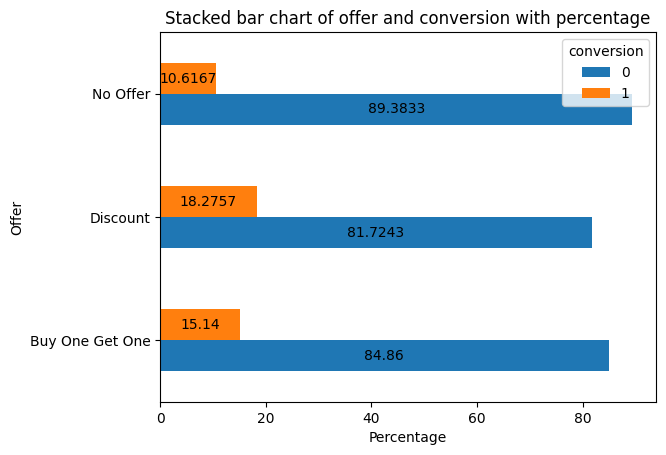

In [58]:
grouped = df.groupby(['offer', 'conversion']).size().reset_index(name='counts')
grouped = grouped.pivot(index='offer', columns='conversion', values='counts')
grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=1)

# create stacked bar chart with percentage
ax = grouped.plot.barh(stacked=False, legend=True)

# add percentage label on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='center', fontsize=10)

plt.xlabel('Percentage')
plt.ylabel('Offer')
plt.title('Stacked bar chart of offer and conversion with percentage')
plt.show()

Why would a discount motivate someone to purchase a product 
A discount can motivate someone to make a purchase for a few reasons:

Financial savings: A discount can make a product or service more affordable for the consumer, which can be a strong motivator for making a purchase.

Urgency: A discount can create a sense of urgency for the consumer to make a purchase before the offer expires.

Perceived value: A discount can make a product or service appear to be a better value to the consumer, even if they may not have otherwise considered it.

Brand loyalty: A discount can also motivate someone to make a purchase if they are loyal to a particular brand or store, and want to take advantage of an offer to save money on a product or service they were already considering purchasing.

Comparison shopping: A discount can also motivate someone to make a purchase if they are comparison shopping and the discount makes the product or service more appealing than the alternatives.

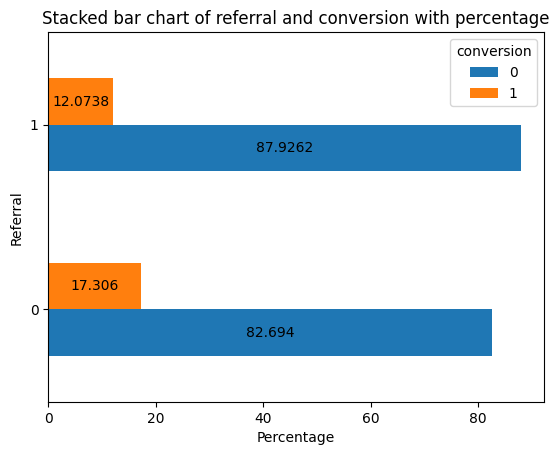

In [65]:
grouped = df.groupby(['is_referral', 'conversion']).size().reset_index(name='counts')
grouped = grouped.pivot(index='is_referral', columns='conversion', values='counts')
grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=1)

# create stacked bar chart with percentage
ax = grouped.plot.barh(stacked=False, legend=True)

# add percentage label on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='center', fontsize=10)

plt.xlabel('Percentage')
plt.ylabel('Referral')
plt.title('Stacked bar chart of referral and conversion with percentage')
plt.show()

Referral customers may be less likely to use a discount even if they have purchased the product in the past for a few reasons:

Brand loyalty: Referral customers may have a strong sense of loyalty to the brand and may feel that the product or service is worth the full price.

Product satisfaction: Referral customers may have had a positive experience with the product or service in the past and may be willing to pay full price for it again.

Personal recommendation: Referral customers may have been referred to the product or service by a friend or family member, they may feel that they have already received a "discount" by not having to spend time researching the product or service themselves.

Limited time offer: The discount may be for a limited time and may not be applicable for the referral customer's next purchase.

Referral customers may have received a referral discounts or rewards and they may consider that as a discount and do not feel the need to use another one.

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


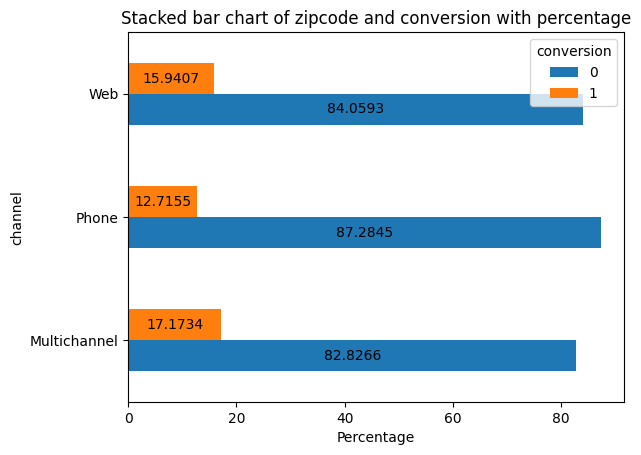

In [72]:


grouped = data.groupby(['channel', 'conversion']).size().reset_index(name='counts')
grouped = grouped.pivot(index='channel', columns='conversion', values='counts')
grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=1)

# create stacked bar chart with percentage
ax = grouped.plot.barh(stacked=False, legend=True)

# add percentage label on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='center', fontsize=10)

plt.xlabel('Percentage')
plt.ylabel('channel')
plt.title('Stacked bar chart of zipcode and conversion with percentage')
plt.show()



There are several reasons why there may be a higher probability of purchase using a desktop compared to a smartphone:



More detailed information: Websites viewed on a desktop may have more detailed information about products and services, which can make it easier for the consumer to make an informed purchase decision.

More payment options: Websites viewed on a desktop may offer more payment options than mobile websites, which can make it easier for the consumer to complete a purchase.

Mobile optimization: Some websites may not be optimized for mobile viewing and may not be as user-friendly or easy to navigate on a smartphone, which can make it less likely for a consumer to complete a purchase.

Security concerns: Some consumers may feel more secure entering personal and financial information on a desktop, as it may be perceived as more secure than on a smartphone.


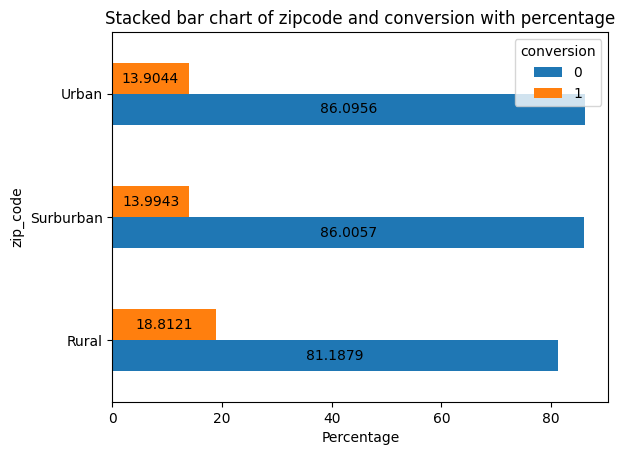

In [73]:
grouped = data.groupby(['zip_code', 'conversion']).size().reset_index(name='counts')
grouped = grouped.pivot(index='zip_code', columns='conversion', values='counts')
grouped = grouped.apply(lambda x: x / x.sum() * 100, axis=1)

# create stacked bar chart with percentage
ax = grouped.plot.barh(stacked=False, legend=True)

# add percentage label on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='center', fontsize=10)

plt.xlabel('Percentage')
plt.ylabel('zip_code')
plt.title('Stacked bar chart of zipcode and conversion with percentage')
plt.show()

Why would someone in  a rural area use a discount more than someone in a urban  area, the data shows a higher percentage on those living in rural areas converting 

people in rural areas tend to have lower incomes than those in urban areas, making discounts more appealing to them. Additionally, prices for goods and services in rural areas may be higher due to a lack of competition, making discounts more valuable. 
 Furthermore, people living in rural area may have less access to shopping places and have to travel more distance to buy things, s
 o online shopping with discounts could be more appealing to them.

<AxesSubplot: ylabel='conversion'>

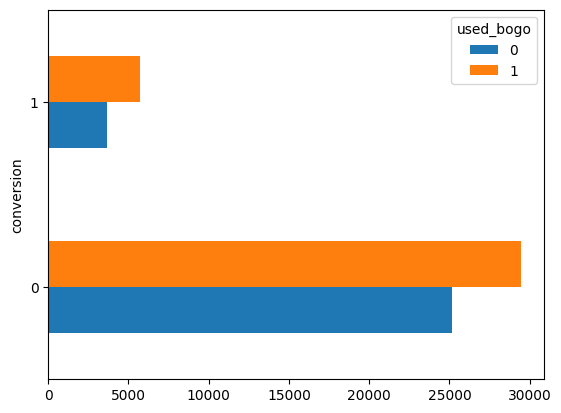

In [50]:
data.groupby('conversion').used_bogo.value_counts().unstack().plot.barh() 

Customers exposed to the treatment and have used  bogo or discount have a higher conversion percent versus customers with no offer,
Indicating an offer is more likely to make a client take action